In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud

In [2]:
from model.fs_TFIDF import get_corpus, _lemmatize_tokens_pos
from model.data_processing import clean_data

In [3]:
filepath = '../data/price_wine_data.csv'
wine_df, wine_stop = clean_data(filepath)

In [4]:
desc = get_corpus(wine_df['description'])
desc = _lemmatize_tokens_pos(desc)

In [5]:
len(desc)

118285

In [49]:
from nltk.corpus import stopwords

wine_stop_lib = ['aroma', 'drink', 'fruit', 'palate', 'wine', 'like', 'bit',
                     'flavor', 'fine', 'sense', 'note', 'notes', 'frame', 'alcohol',
                     'yet', 'seem', 'bottle', 'flavor', 'show', 'good', 'cabernet',
                     'year', 'chardonnay',  'winemaker', 'verdot', 'noir', 'blanc', 'grigio',
                     'gris', 'taste', 'blend', 'pinot', 'cab', 'franc', 'nose',
                     'vineyard', 'flavors', 'one', 'two', 'three', 'four', 'five',
                     'six', 'seven', 'eight', 'nine', 'ten', 'shows'] + stopwords.words('english') 

In [50]:
wine_stop_lib = [x.encode('utf8') for x in wine_stop_lib]

In [13]:
desc_conc = '; '.join(desc)


In [60]:
len(desc_conc)

15870927

In [20]:
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100              
mpl.rcParams['figure.subplot.bottom']=.1

In [58]:
wordcloud = WordCloud(background_color=None,
                      mode="RGBA",
                     stopwords=wine_stop_lib,
                     max_words=200,
                     max_font_size=60,
                     width=400,
                     height=400,
                     colormap="RdGy").generate(desc_conc.decode(errors='ignore'))

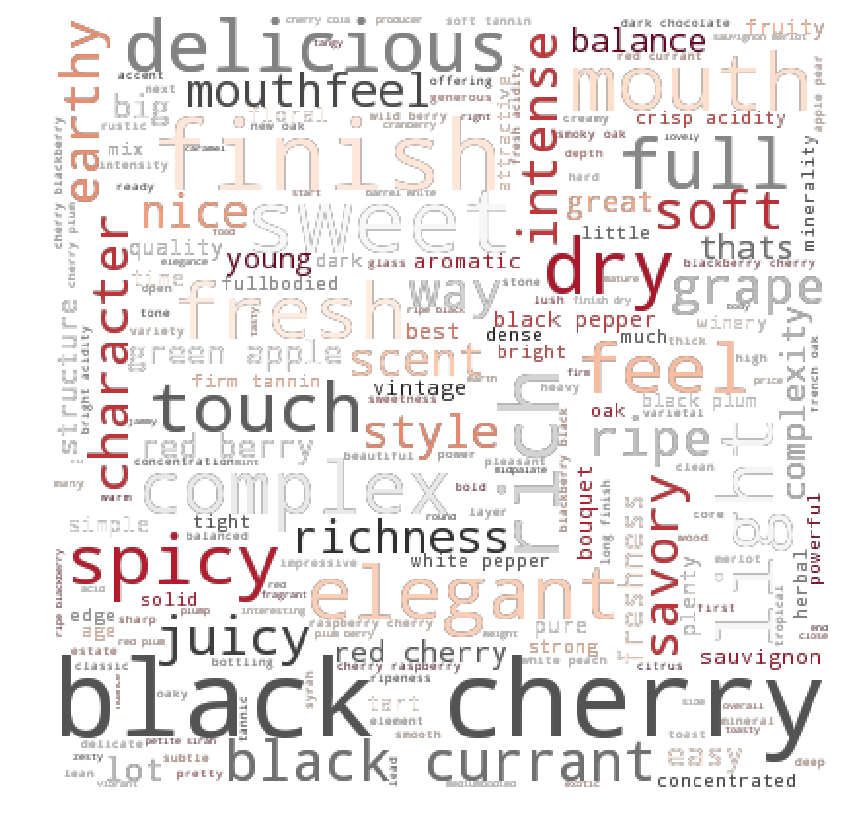

In [59]:
print(wordcloud)
fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word4.png")